In [1]:
%load_ext autoreload
%autoreload 2
!hostname
!pwd
import os, sys
print(sys.executable)
os.environ['CUDA_VISIBLE_DEVICES'] = "4"
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'

fish-gcp005
/home/akarshkumar0101/nca-alife/src
/home/akarshkumar0101/miniconda3/envs/nca-alife-jax/bin/python


In [2]:
import os, sys, glob, pickle
from functools import partial

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from tqdm.auto import tqdm
from einops import rearrange, reduce, repeat

In [3]:
import experiment_utils
import util

# Create Experiment

In [4]:
! rm -rf ./experiments
! mkdir -p ./experiments

In [7]:
cfg_default = dict(
    seed=0, save_dir=None,
    prompt="",
    algo="",
    rollout_steps=200,
    bs=32, n_iters=10000,
)

seed_sweep = np.arange(4)

prompt_sweep = [
    "a biological cell",
    "a biological cell under the microscope",
    "a red organism",
    "a cool colorful pattern",
    "a bacterium under the microscope",
    "an artificial life organism",
    "the lenia creature: Orbium",
]

algo_sweep = ["Sep_CMA_ES", "CMA_ES"]

cfgs = []
for algo in algo_sweep:
    for seed in seed_sweep:
        for iprt, prompt in enumerate(prompt_sweep):
            cfg = cfg_default.copy()
            cfg.update(seed=seed, algo=algo, prompt=prompt)
            cfg.update(save_dir=f"/home/akarshkumar0101/nca-alife-data/lenia_prompt1/{seed}_{algo}_{iprt}")
            cfgs.append(cfg)

# print(cfgs)
print(len(cfgs))

56


In [8]:
commands = experiment_utils.create_commands(cfgs, prefix='python train_lenia_evosax.py', out_file='./experiments/main.sh')
print('\n'.join(commands[:3]), '\n...')
print(len(commands), 'commands')

python train_lenia_evosax.py --seed=0 --save_dir="/home/akarshkumar0101/nca-alife-data/lenia_prompt1/0_Sep_CMA_ES_0" --prompt="a biological cell"                      --algo="Sep_CMA_ES" --rollout_steps=200 --bs=32 --n_iters=10000
python train_lenia_evosax.py --seed=0 --save_dir="/home/akarshkumar0101/nca-alife-data/lenia_prompt1/0_Sep_CMA_ES_1" --prompt="a biological cell under the microscope" --algo="Sep_CMA_ES" --rollout_steps=200 --bs=32 --n_iters=10000
python train_lenia_evosax.py --seed=0 --save_dir="/home/akarshkumar0101/nca-alife-data/lenia_prompt1/0_Sep_CMA_ES_2" --prompt="a red organism"                         --algo="Sep_CMA_ES" --rollout_steps=200 --bs=32 --n_iters=10000 
...
56 commands


# Visualize Results

In [9]:
import jax
import jax.numpy as jnp
import copy

In [25]:
df = []

for cfg in tqdm(cfgs):
    save_dir = cfg['save_dir']
    # data_dense = util.load_pkl(save_dir, 'data_dense')
    # data_dense = jax.tree.map(lambda *x: np.stack(x, axis=0), *data_dense)
    
    dfi = copy.copy(cfg)
    try:
        data = util.load_pkl(save_dir, 'data')
        loss = data['best_fitness'][-1].item()
        dfi['loss'] = loss
    except:
        pass
        
    df.append(dfi)
df = pd.DataFrame(df)

  0%|          | 0/56 [00:00<?, ?it/s]

In [32]:
df

,seed,save_dir,prompt,algo,rollout_steps,bs,n_iters,loss
0,0,/home/akarshkumar0101/nca-alife-data/lenia_pro...,a biological cell,Sep_CMA_ES,200,32,10000,-0.311503
1,0,/home/akarshkumar0101/nca-alife-data/lenia_pro...,a biological cell under the microscope,Sep_CMA_ES,200,32,10000,-0.296194
2,0,/home/akarshkumar0101/nca-alife-data/lenia_pro...,a red organism,Sep_CMA_ES,200,32,10000,-0.310782
3,0,/home/akarshkumar0101/nca-alife-data/lenia_pro...,a cool colorful pattern,Sep_CMA_ES,200,32,10000,-0.334828
4,0,/home/akarshkumar0101/nca-alife-data/lenia_pro...,a bacterium under the microscope,Sep_CMA_ES,200,32,10000,-0.301746
5,0,/home/akarshkumar0101/nca-alife-data/lenia_pro...,an artificial life organism,Sep_CMA_ES,200,32,10000,-0.288221
6,0,/home/akarshkumar0101/nca-alife-data/lenia_pro...,the lenia creature: Orbium,Sep_CMA_ES,200,32,10000,-0.255862
7,1,/home/akarshkumar0101/nca-alife-data/lenia_pro...,a biological cell,Sep_CMA_ES,200,32,10000,-0.332329
8,1,/home/akarshkumar0101/nca-alife-data/lenia_pro...,a biological cell under the microscope,Sep_CMA_ES,200,32,10000,-0.301927
9,1,/home/akarshkumar0101/nca-alife-data/lenia_pro...,a red organism,Sep_CMA_ES,200,32,10000,-0.300955


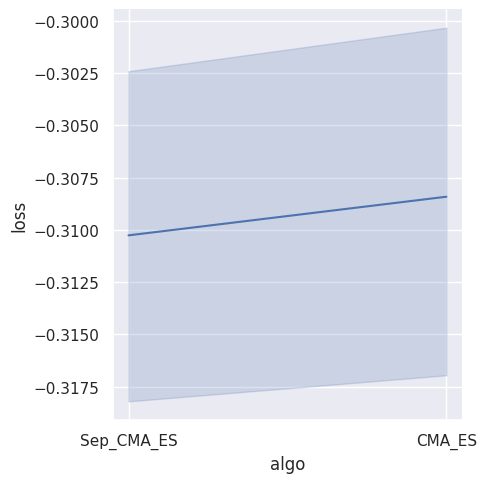

In [88]:
sns.relplot(data=df, x='algo', y='loss', kind='line')

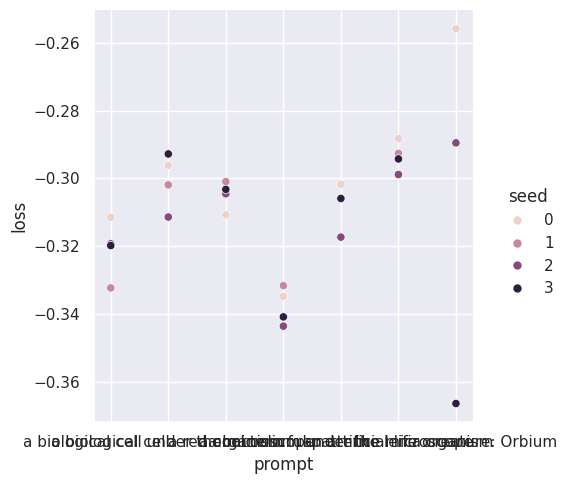

In [69]:
sns.relplot(data=df[df.algo=='Sep_CMA_ES'], x='prompt', y='loss', hue='seed')

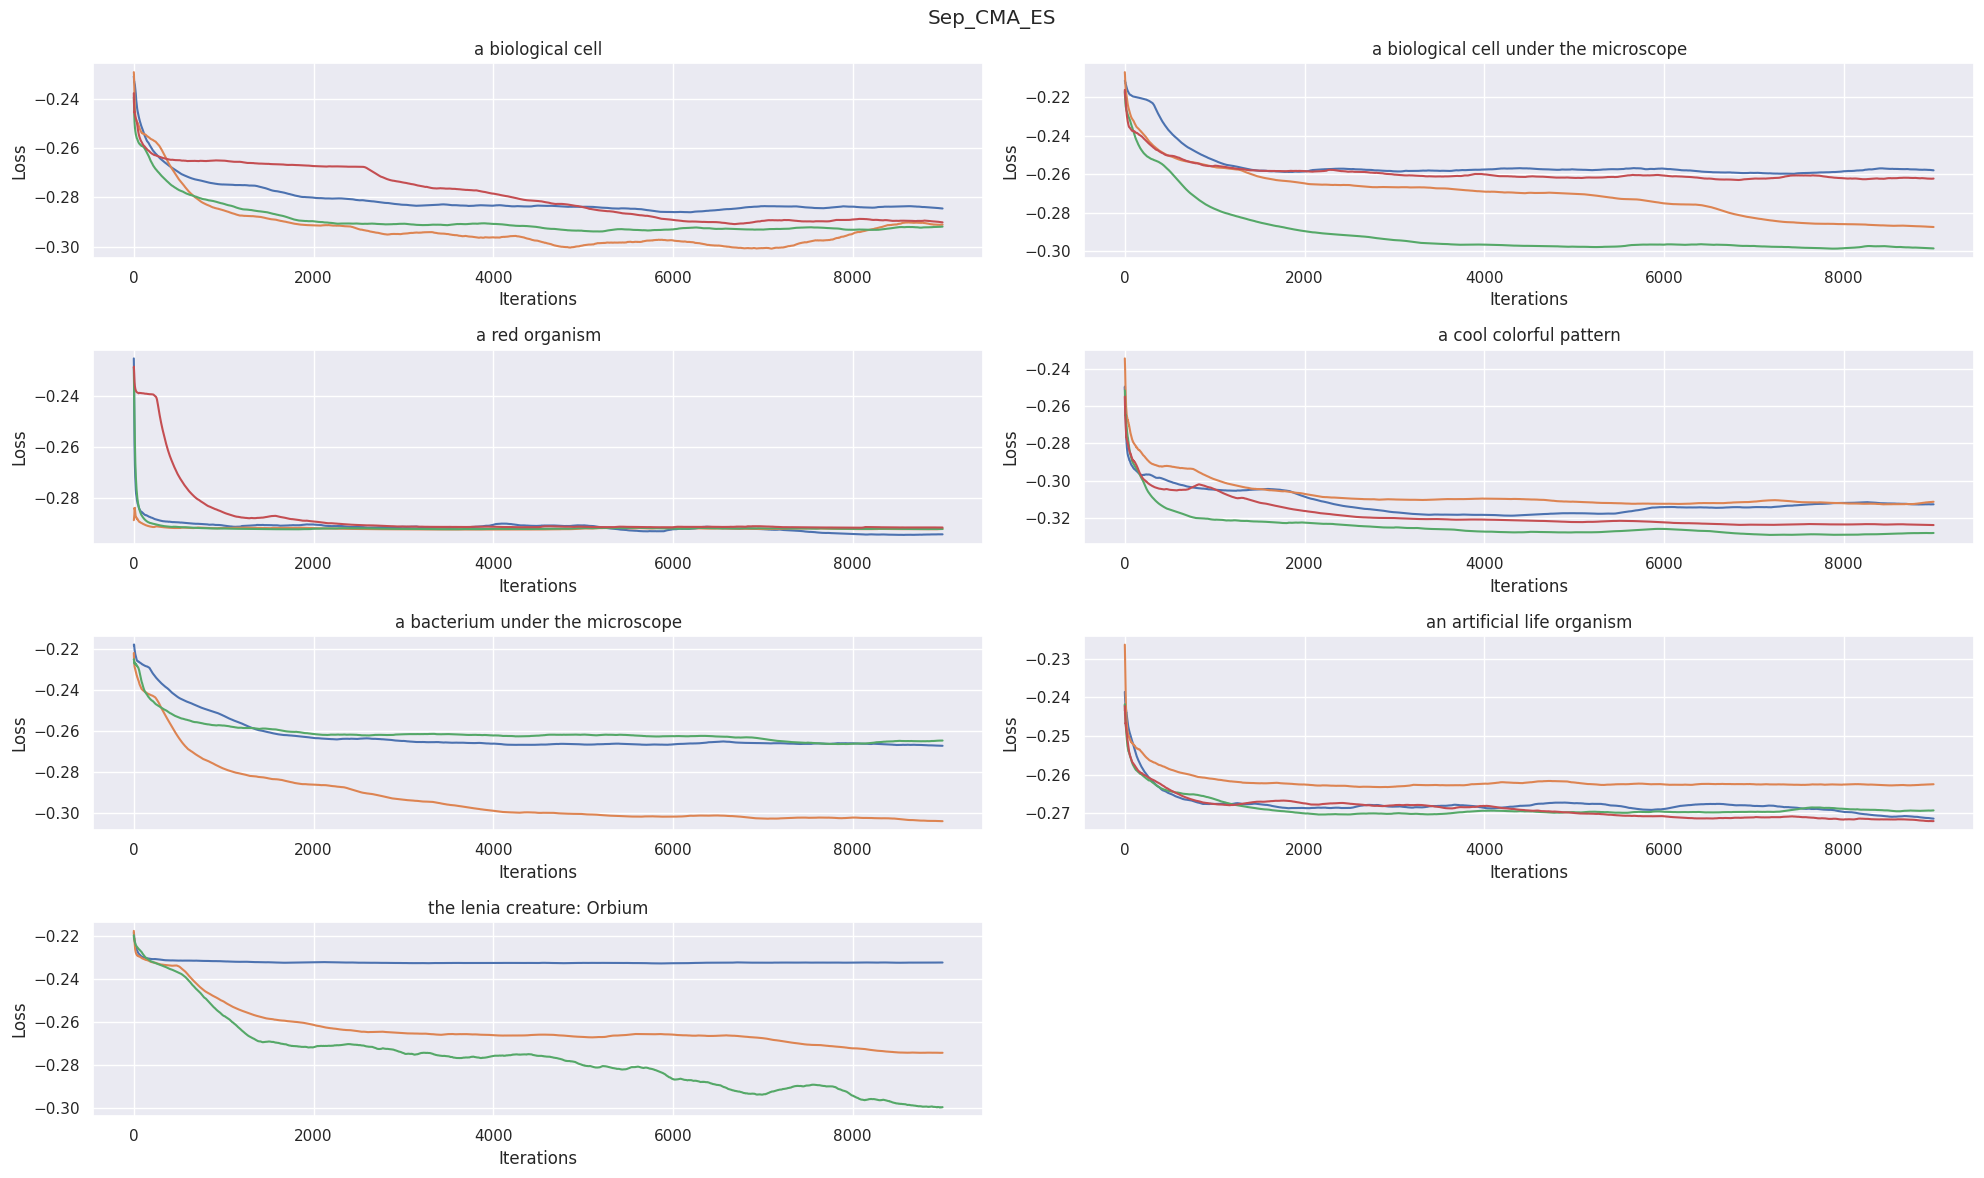

In [90]:
algo = 'Sep_CMA_ES'
plt.figure(figsize=(20, 12))
for iprt, prompt in enumerate(prompt_sweep):
    plt.subplot(4, 2, iprt+1)
    plt.title(prompt)
    for seed in seed_sweep:
        try:
            save_dir=f"/home/akarshkumar0101/nca-alife-data/lenia_prompt1/{seed}_{algo}_{iprt}"
            data = util.load_pkl(save_dir, 'data')
            loss = pd.DataFrame(data['loss'])
            plt.plot(loss.ewm(span=1000).mean())
        except:
            pass
    plt.ylabel("Loss")
    plt.xlabel("Iterations")
plt.suptitle(algo)
plt.tight_layout()
plt.show()

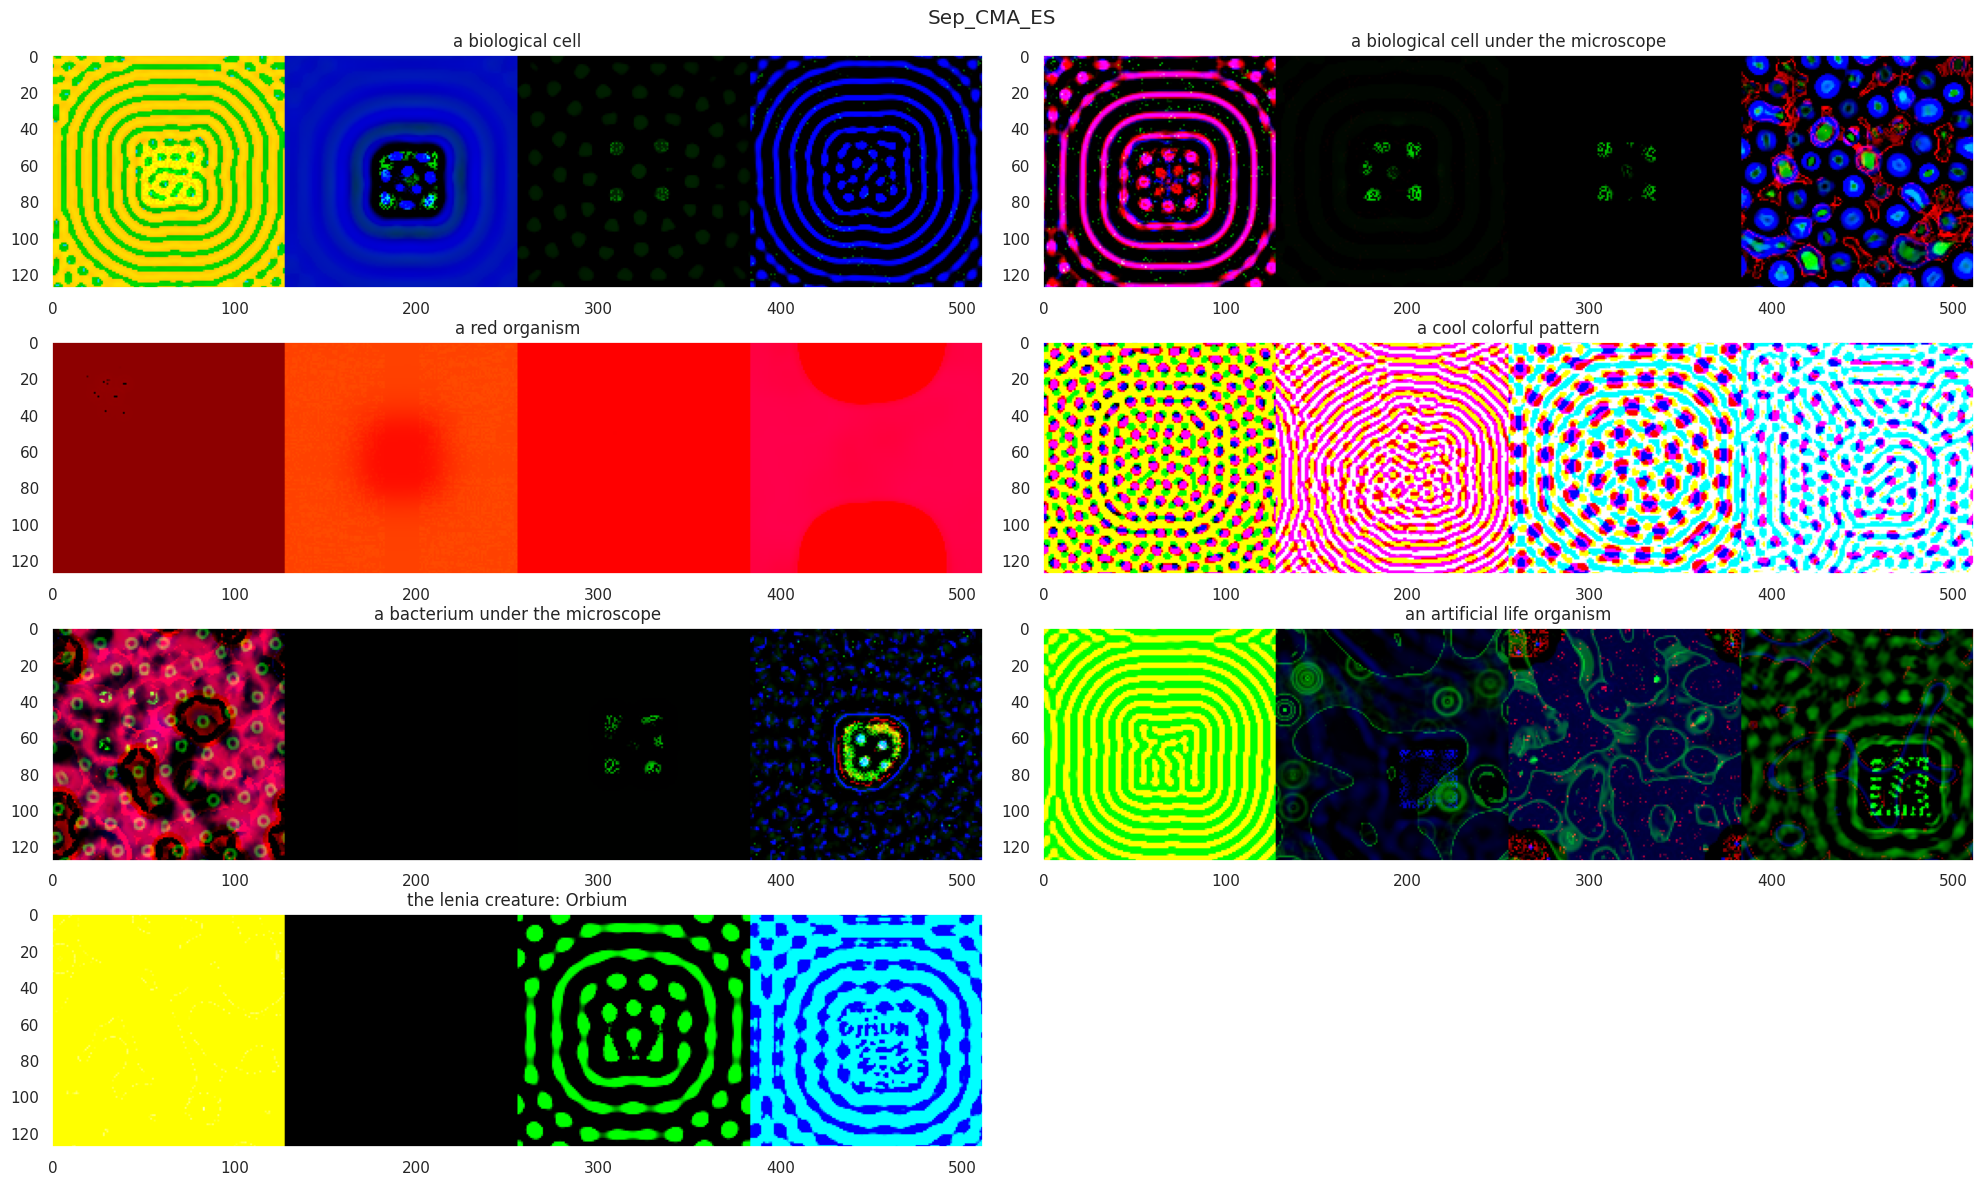

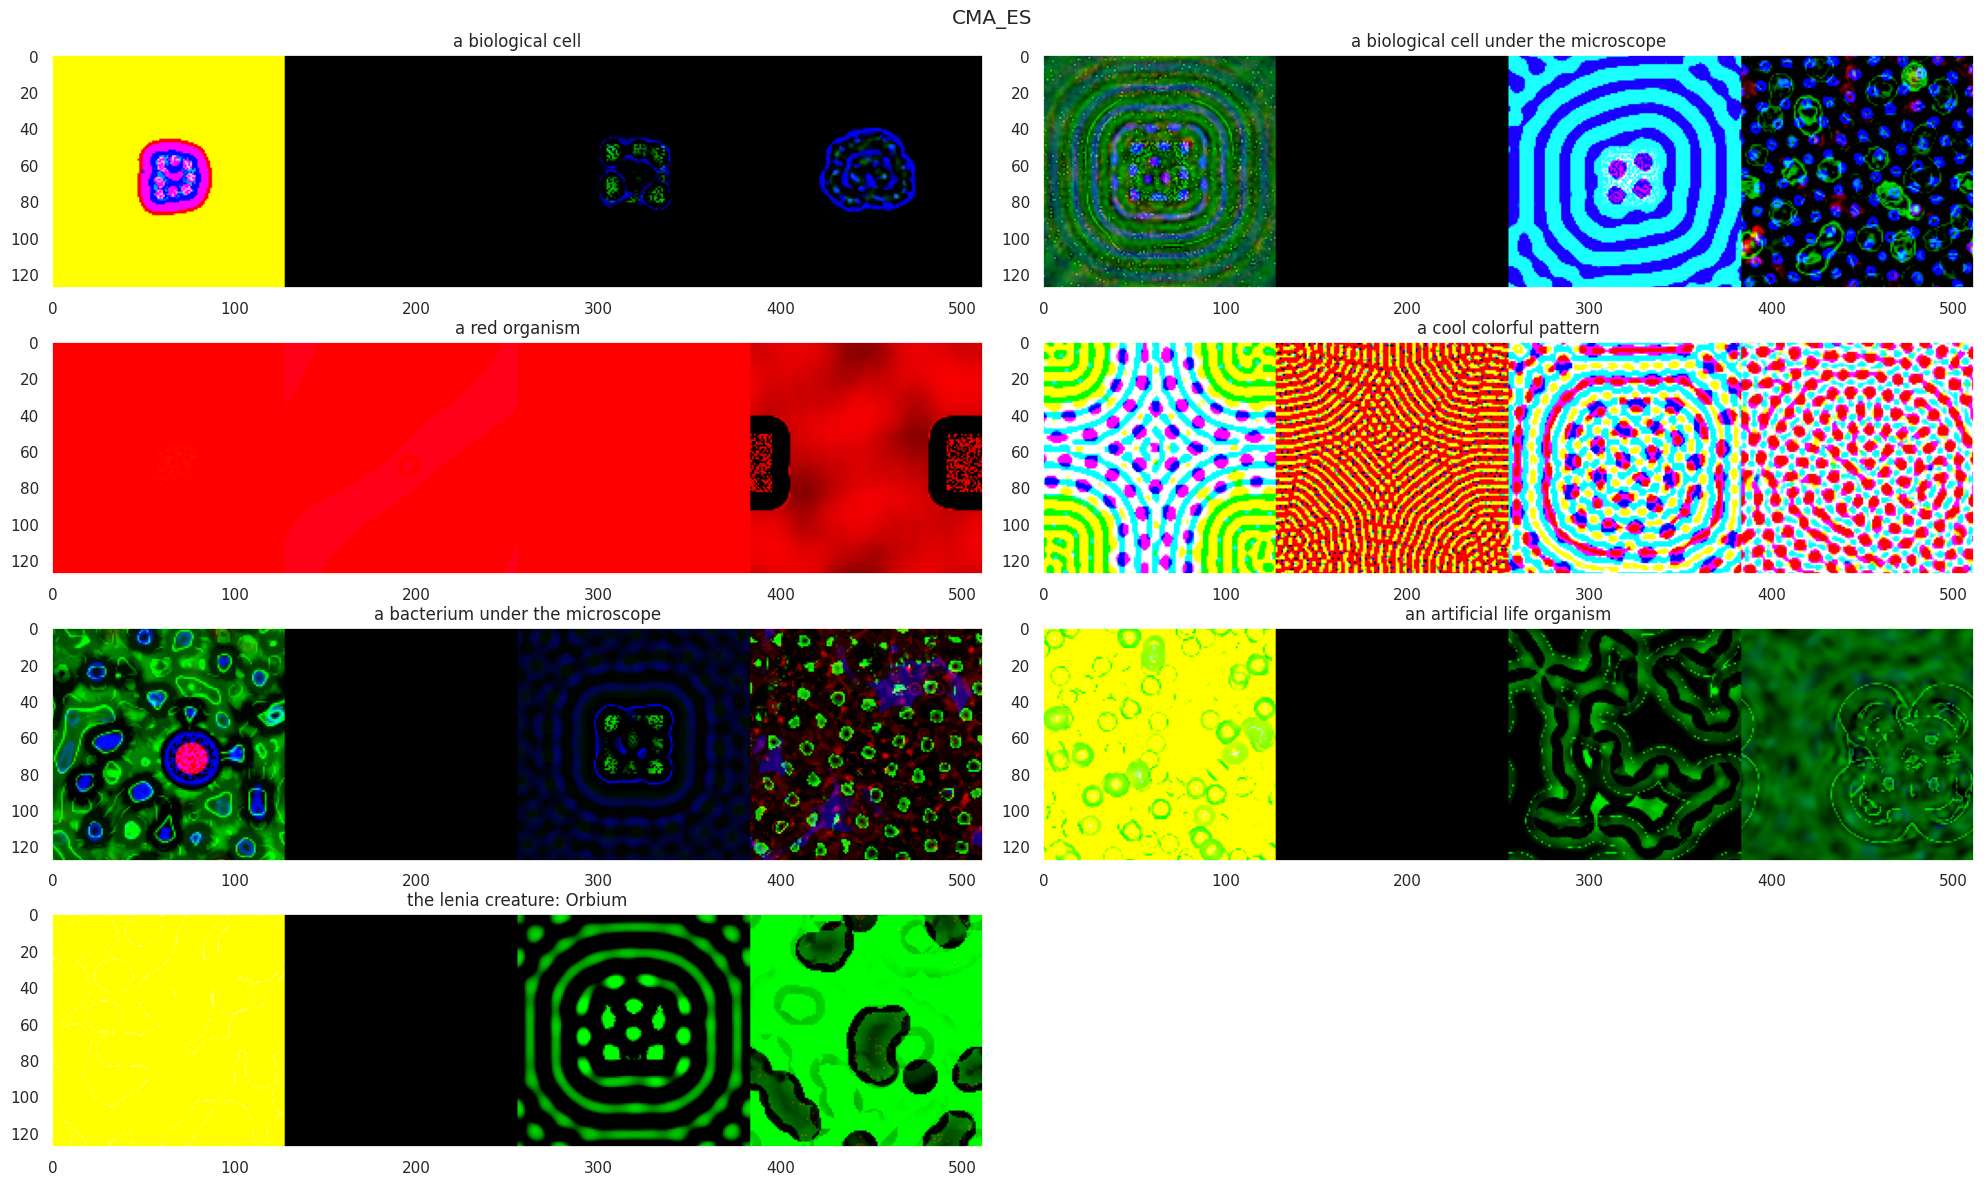

In [64]:
for algo in algo_sweep:
    plt.figure(figsize=(20, 12))
    for iprt, prompt in enumerate(prompt_sweep):
        imgs = []
        for seed in seed_sweep:
            try:
                save_dir=f"/home/akarshkumar0101/nca-alife-data/lenia_prompt1/{seed}_{algo}_{iprt}"
                img = util.load_pkl(save_dir, 'vid').astype(np.uint8)[-1]
            except:
                img = np.zeros((128, 128, 3), dtype=np.uint8)
            imgs.append(img)
        img = rearrange(np.stack(imgs), "(R C) H W D -> (R H) (C W) D", R=1)
        plt.subplot(4, 2, iprt+1)
        plt.imshow(img)
        plt.grid(False)
        plt.title(prompt)
    plt.suptitle(algo)
    plt.tight_layout()
    plt.show()